In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Libary\covid-19-all.csv')

df

C:\Users\hp\AppData\Local\Temp\ipykernel_6544\3182635409.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\hp\Desktop\Libary\covid-19-all.csv')


,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,NaN,NaN,NaN,NaN,51526.0,41727.0,2191.0,2021-01-01
1,NaN,NaN,NaN,NaN,58316.0,33634.0,1181.0,2021-01-01
2,NaN,NaN,NaN,NaN,99897.0,67395.0,2762.0,2021-01-01
3,NaN,NaN,NaN,NaN,8117.0,7463.0,84.0,2021-01-01
4,NaN,NaN,NaN,NaN,17568.0,11146.0,405.0,2021-01-01
...,...,...,...,...,...,...,...,...
1241947,Vietnam,NaN,14.058324,108.277199,1465.0,1325.0,35.0,2020-12-31
1241948,West Bank and Gaza,NaN,31.952200,35.233200,138004.0,117183.0,1400.0,2020-12-31
1241949,Yemen,NaN,15.552727,48.516388,2099.0,1394.0,610.0,2020-12-31
1241950,Zambia,NaN,-13.133897,27.849332,20725.0,18660.0,388.0,2020-12-31


In [3]:
# (I). THE SPREAD OF CORONA VIRUS ACROSS DIFFERENT GEOGRAPHICAL COUNTRIES
print(df.dtypes)

# REMOVING NAN VALUES
df.dropna(inplace=True)

# CHANGING THE DATA TYPE INTO INTEGER
df['Confirmed'] = df['Confirmed'].astype(int)
df['Recovered'] = df['Recovered'].astype(int)
df['Deaths'] = df['Deaths'].astype(int)

print(df.head())

spread = df.groupby('Country/Region')[['Province/State', 'Confirmed']].max()
spread

Country/Region     object
Province/State     object
Latitude          float64
Longitude         float64
Confirmed         float64
Recovered         float64
Deaths            float64
Date               object
dtype: object
      Country/Region Province/State  Latitude  Longitude  Confirmed  \
83536          China          Hubei   30.9756   112.2707        444   
87549          China          Hubei   30.9756   112.2707        444   
87553          China          Hubei   30.9756   112.2707        444   
91565          China          Hubei   30.9756   112.2707        549   
95585          China          Hubei   30.9756   112.2707        761   

       Recovered  Deaths        Date  
83536         28      17  2020-01-22  
87549         28      17  2020-01-23  
87553         28      17  2020-01-23  
91565         31      24  2020-01-24  
95585         32      40  2020-01-25  


,Province/State,Confirmed
Country/Region,,
Australia,Western Australia,20376
Belgium,West Flanders,101966
Brazil,Unknown,1462297
Canada,Yukon,202641
Chile,Valparaiso,319054
China,Zhejiang,68149
Colombia,Vichada,471155
Cruise Ship,Diamond Princess,712
Denmark,Greenland,1326


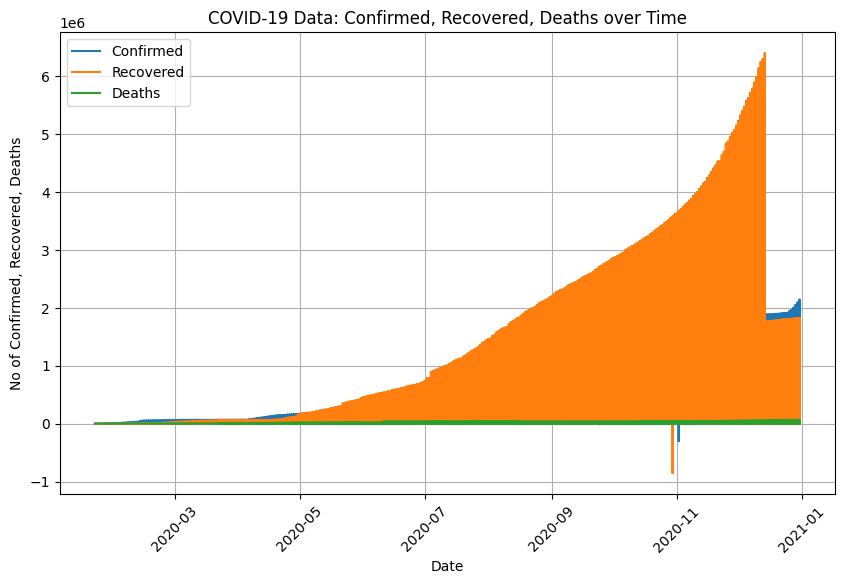

In [17]:
# (II) TIME GRAPH SHOWING THE NUMBER OF RECOVERED CONFIRMED AND DEATH CASES

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Confirmed'], label='Confirmed')
plt.plot(df['Date'], df['Recovered'], label='Recovered')
plt.plot(df['Date'], df['Deaths'], label='Deaths')

# Labels and title
plt.xlabel('Date')
plt.ylabel('No of Confirmed, Recovered, Deaths')
plt.title('COVID-19 Data: Confirmed, Recovered, Deaths over Time')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


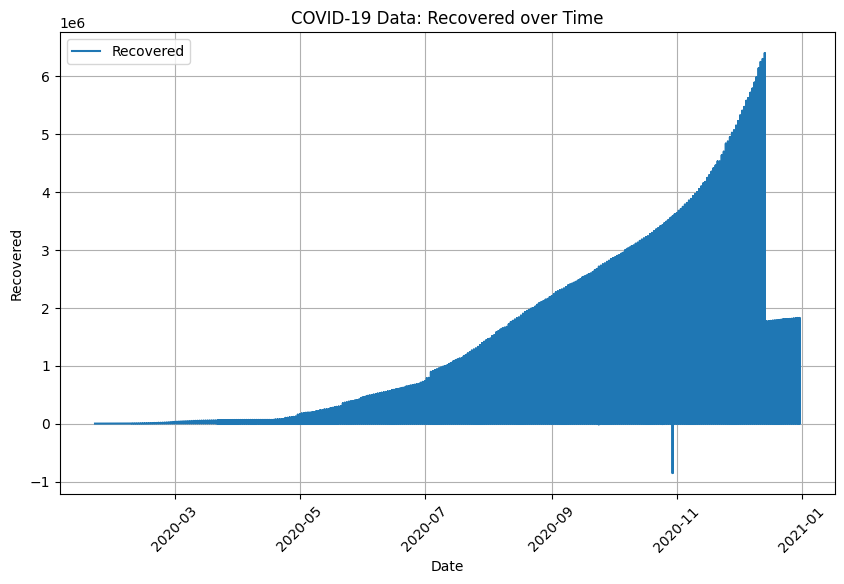

In [25]:
# (II) TIME GRAPH SHOWING THE NUMBER OF RECOVERED CONFIRMED AND DEATH CASES

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Recovered'], label='Recovered')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Recovered')
plt.title('COVID-19 Data: Recovered over Time')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


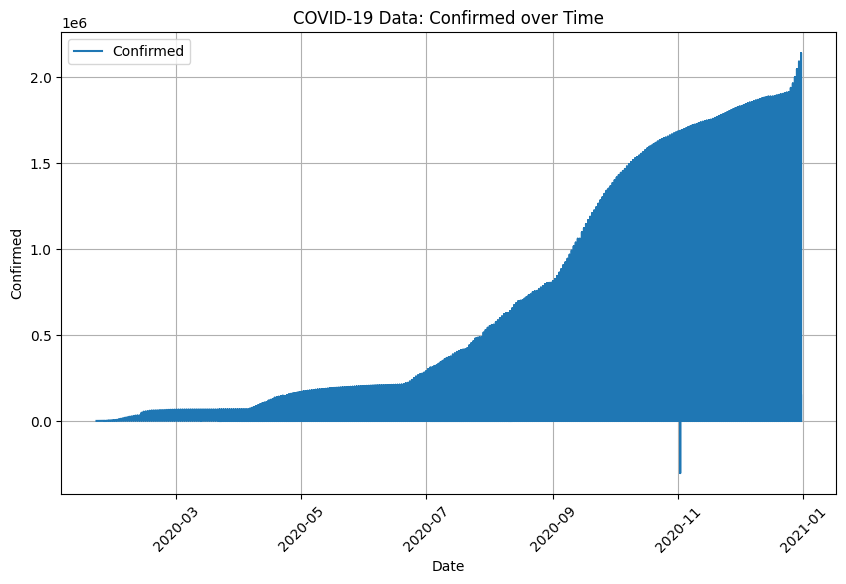

In [26]:
# (II) TIME GRAPH SHOWING THE NUMBER OF RECOVERED CONFIRMED AND DEATH CASES

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Confirmed'], label='Confirmed')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.title('COVID-19 Data: Confirmed over Time')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


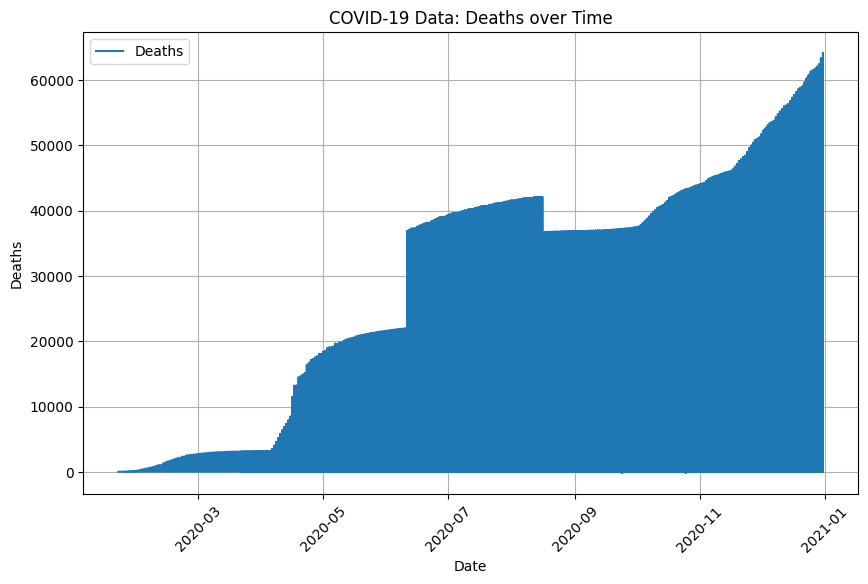

In [24]:
# (II) TIME GRAPH SHOWING THE NUMBER OF RECOVERED CONFIRMED AND DEATH CASES

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Deaths'], label='Deaths')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('COVID-19 Data: Deaths over Time')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [6]:
# (III) ANALYSE THE MORTALITY AND RECOVERY RATE

df['Mortality Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100

df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100
df

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date,Mortality Rate (%),Recovery Rate (%)
83536,China,Hubei,30.9756,112.2707,444,28,17,2020-01-22,3.828829,6.306306
87549,China,Hubei,30.9756,112.2707,444,28,17,2020-01-23,3.828829,6.306306
87553,China,Hubei,30.9756,112.2707,444,28,17,2020-01-23,3.828829,6.306306
91565,China,Hubei,30.9756,112.2707,549,31,24,2020-01-24,4.371585,5.646630
95585,China,Hubei,30.9756,112.2707,761,32,40,2020-01-25,5.256242,4.204993
...,...,...,...,...,...,...,...,...,...,...
1241938,United Kingdom,Northern Ireland,54.7877,-6.4923,72834,0,1322,2020-12-31,1.815086,0.000000
1241939,United Kingdom,Scotland,56.4907,-4.2026,127453,0,4578,2020-12-31,3.591912,0.000000
1241940,United Kingdom,Turks and Caicos Islands,21.6940,-71.7979,893,783,6,2020-12-31,0.671892,87.681971
1241941,United Kingdom,Unknown,32.3078,-59.5236,0,0,0,2020-12-31,NaN,NaN


In [28]:
sample_df = df.groupby('Country/Region')[['Mortality Rate (%)', 'Recovery Rate (%)']].max()
sample_df

,Mortality Rate (%),Recovery Rate (%)
Country/Region,,
Australia,50.000000,101.716069
Belgium,183.464418,0.000000
Brazil,11.308024,inf
Canada,inf,inf
Chile,inf,inf
China,6.622828,100.000000
Colombia,inf,inf
Cruise Ship,1.123596,79.634831
Denmark,0.980392,100.000000
